In [ ]:
# Project Report: Employee Attrition Prediction

In [1]:
#1. Data Acquisition
# loaded the IBM HR Attrition dataset (1470 rows × 35 features).
import kagglehub, os, pandas as pd

# Download dataset from Kaggle
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")
file_path = os.path.join(path, "WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Load dataset
df = pd.read_csv(file_path)
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#2. Data Exploration
# Basic info
df.info()
df.describe()

# Unique values per feature
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Missing values check
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
#3.Data Cleaning
df = df.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'])


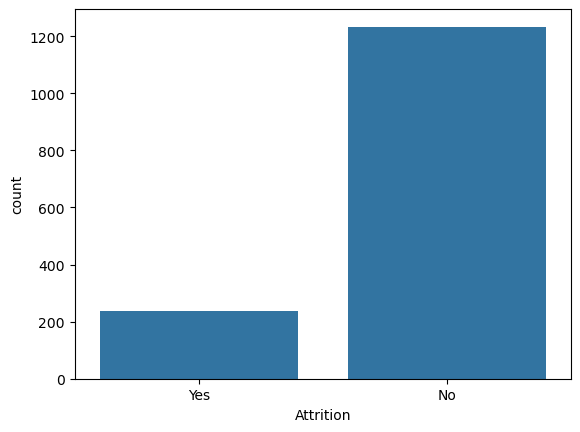

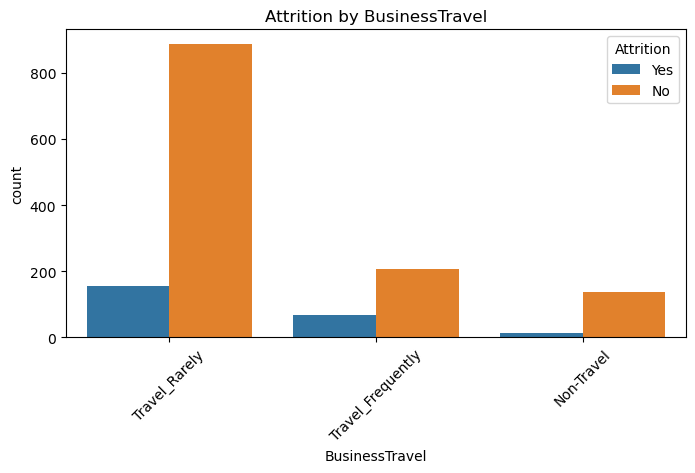

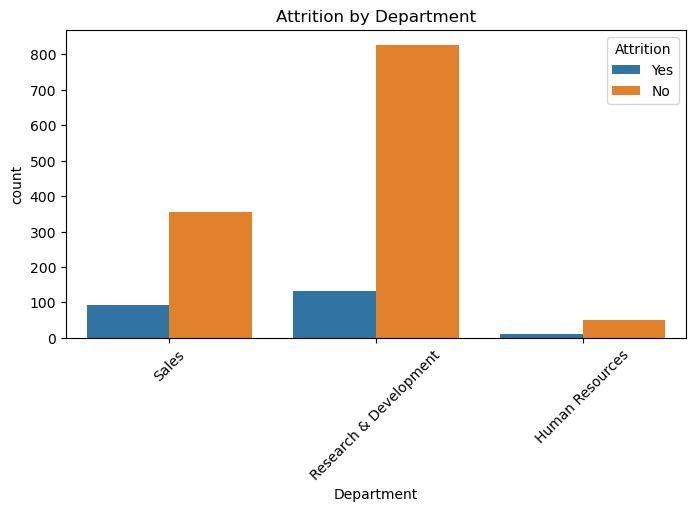

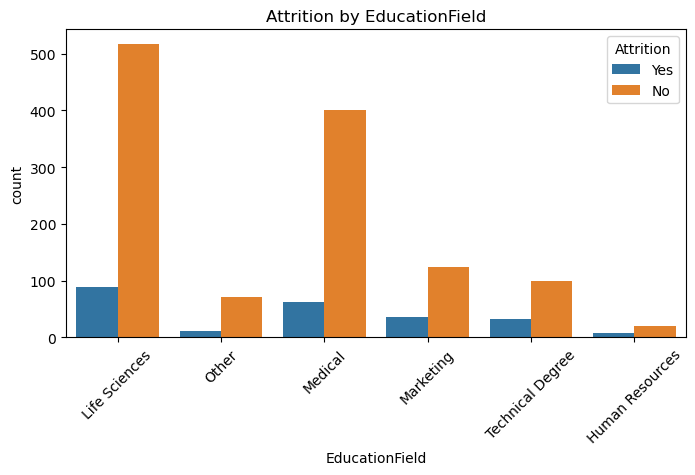

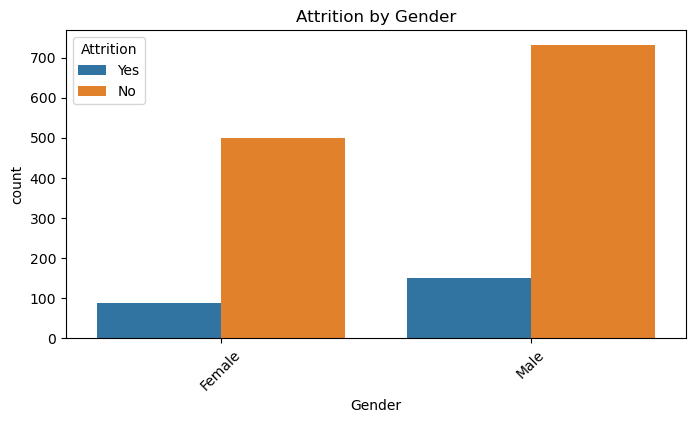

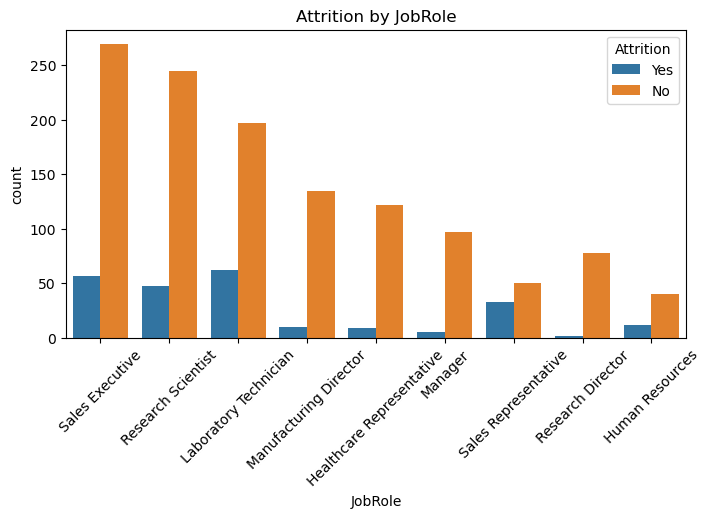

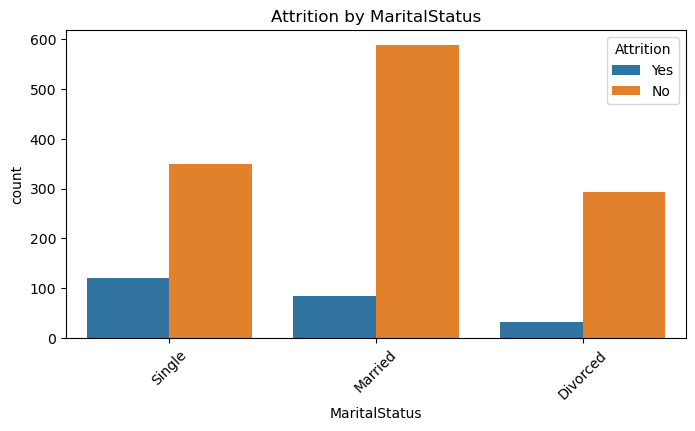

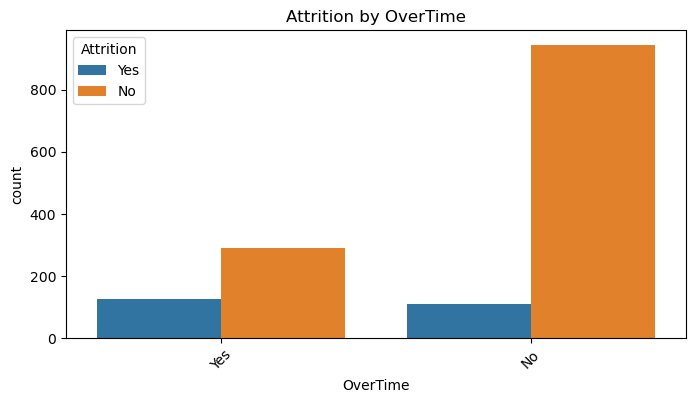

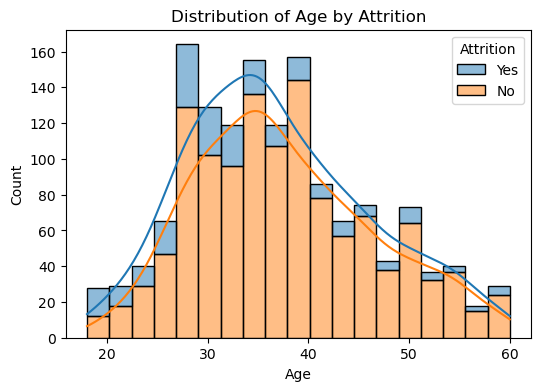

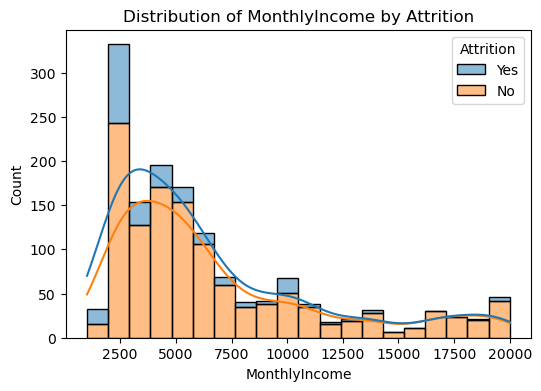

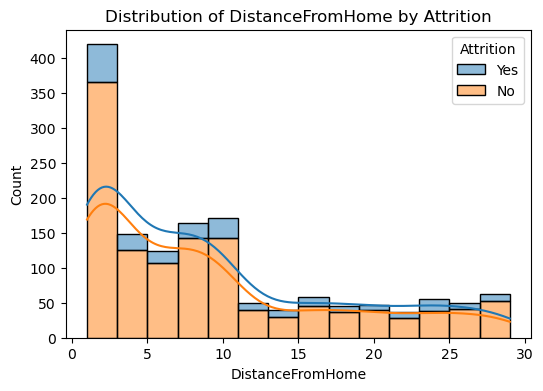

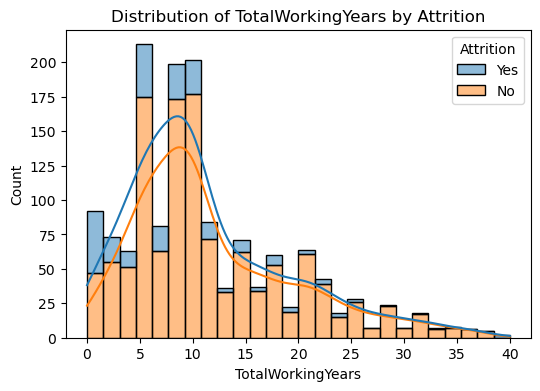

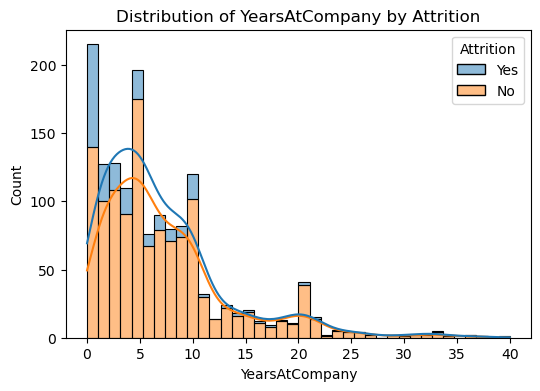

In [7]:
#4. Exploratory Data Analysis (EDA)
import seaborn as sns, matplotlib.pyplot as plt

# Attrition distribution
sns.countplot(data=df, x="Attrition")
plt.show()

# Categorical features vs Attrition
for col in ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue="Attrition", data=df)
    plt.title(f'Attrition by {col}')
    plt.xticks(rotation=45)
    plt.show()

# Numerical features vs Attrition
for col in ['Age','MonthlyIncome','DistanceFromHome','TotalWorkingYears','YearsAtCompany']:
    plt.figure(figsize=(6,4))
    sns.histplot(df, x=col, hue="Attrition", kde=True, multiple="stack")
    plt.title(f'Distribution of {col} by Attrition')
    plt.show()


In [9]:
#5. Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Target variable → numeric
y = df["Attrition"].map({"Yes":1, "No":0})
X = pd.get_dummies(df.drop("Attrition", axis=1), drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Handle imbalance with SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Before SMOTE: Attrition
0    986
1    190
Name: count, dtype: int64
After SMOTE: Attrition
0    986
1    986
Name: count, dtype: int64


In [ ]:
#6. Modeling & Results

In [11]:
#(a) Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train_res, y_train_res)
y_pred_lr = log_reg.predict(X_test)

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.90      0.89      0.90       247
           1       0.46      0.47      0.46        47

    accuracy                           0.83       294
   macro avg       0.68      0.68      0.68       294
weighted avg       0.83      0.83      0.83       294



C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.88      0.81      0.84       247
           1       0.29      0.43      0.35        47

    accuracy                           0.74       294
   macro avg       0.59      0.62      0.59       294
weighted avg       0.79      0.74      0.76       294



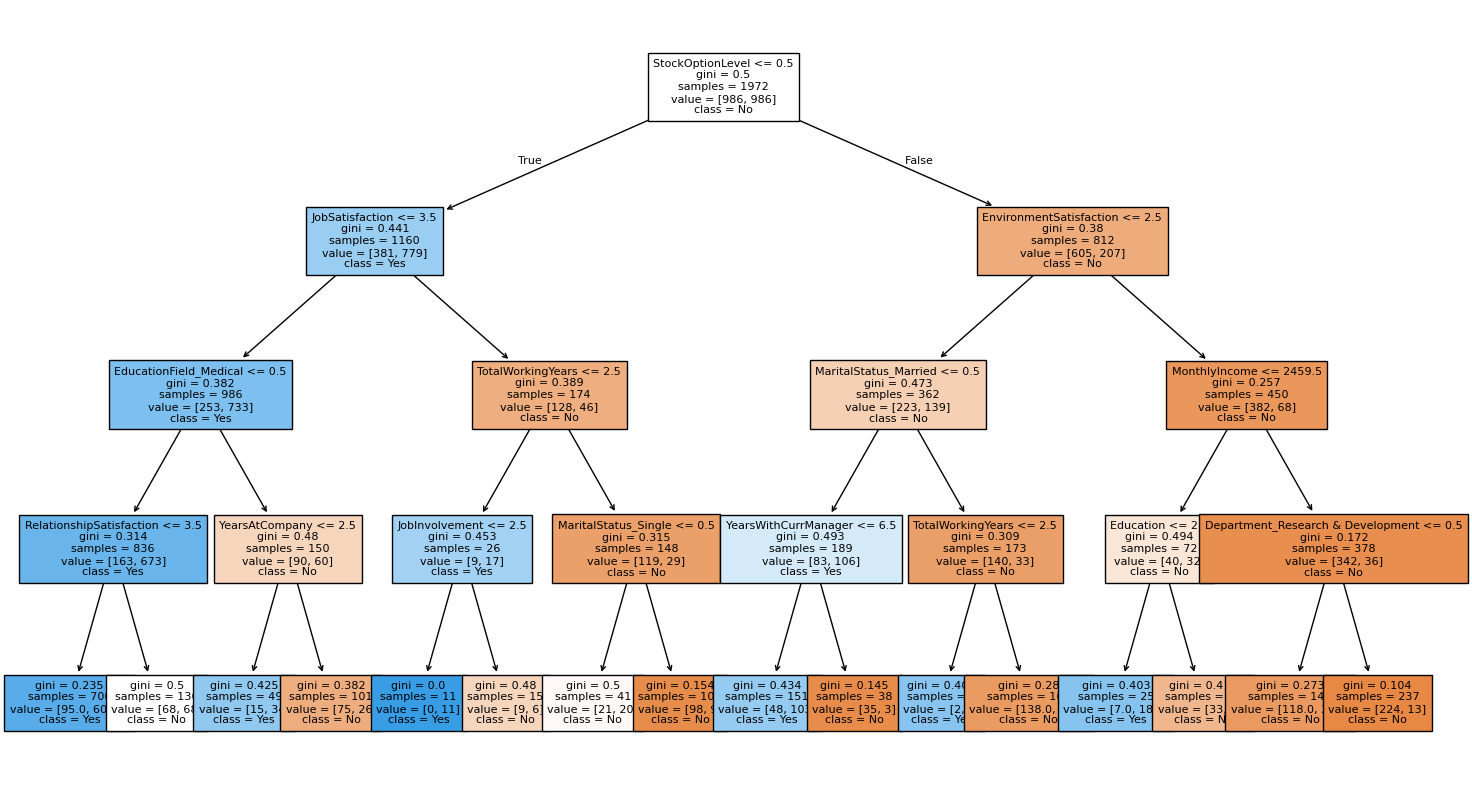

In [13]:
#(b) Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(18,10))
plot_tree(dt, feature_names=X.columns, class_names=["No","Yes"], filled=True, fontsize=8)
plt.show()


              precision    recall  f1-score   support

           0       0.87      0.93      0.90       247
           1       0.41      0.26      0.32        47

    accuracy                           0.82       294
   macro avg       0.64      0.59      0.61       294
weighted avg       0.80      0.82      0.81       294



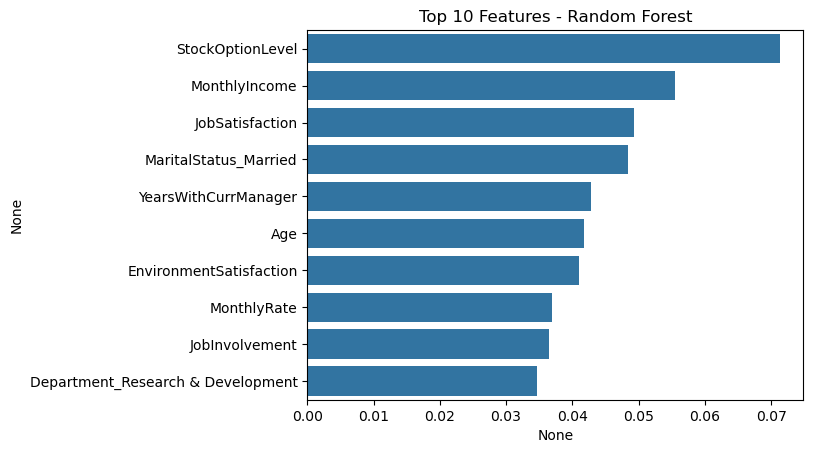

In [15]:
#(c) Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top 10 Features - Random Forest")
plt.show()


In [19]:
import joblib

joblib.dump(log_reg, "log_reg_model.pkl")
joblib.dump(dt, "decision_tree_model.pkl")
joblib.dump(rf, "random_forest_model.pkl")



['random_forest_model.pkl']

In [21]:
joblib.dump(log_reg, "log_reg_model.pkl")
joblib.dump(dt, "decision_tree_model.pkl")


['decision_tree_model.pkl']

In [25]:
import joblib

# Save Logistic Regression model
joblib.dump(log_reg, "log_reg_model.pkl")


['log_reg_model.pkl']